In [ ]:
!pip install tashaphyne
from tashaphyne.stemming import ArabicLightStemmer


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.5/251.5 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 10.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
import re
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from tashaphyne.stemming import ArabicLightStemmer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df = pd.read_csv('/content/Dataset - Sheet1 (11).csv')

In [ ]:
df

,id_case,type,full_text,summary
0,1,جنائية,الحمد لله وحده، وبعد: وفي يوم الاثنين ١ / ١ / ...,أقام المدعي العام دعواه ضد المدعى عليه طالباً ...
1,2,جنائية,الحمد لله وحده، وبعد: فلدي أنا (...) القاضي في...,أقام المدعي العام دعواه ضد المدعى عليه، طالباً...
2,3,جنائية,الحمد لله وحده، والصلاة والسلام على من لا نبي ...,أقام المدعي العام دعواه ضد المدعى عليه، طالباً...
3,4,جنائية,الحمد لله وحده، وبعد: فلدي أنا (...) القاضي في...,أقام المدعي العام دعواه ضد الحدث المدعى عليه، ...
4,5,احوال,اليوم أطلب إلزامه بالنفقة الماضية على ابنتي هذ...,ادعت المدعية على المدعى عليه وكالة بأن موكله ت...
...,...,...,...,...
895,896,احوال,\nطلب المدعي إلزام الجهة المدعى عليها بإعادة ا...,\nطلب المدعي إلزام الجهة المدعى عليها بإعادة ا...
896,897,احوال,الحمد لله وحده وبعد فلدي أنا .... مساعد رئيس ...,ادعى وكيلا المدعين بأن مورثهم خلف من ضمن تركت...
897,898,احوال,الحمد لله وحده وبعد فلدي أنا القاضي في المحكمة...,ادعى المدعي ضد المدعى عليهم بأن مورثهم خلف عما...
898,899,احوال,الحمد لله وحده وبعد فلدي أنا القاضي في المحكمة...,ادعى المدعي بأنه كان زوجاً للمدعى عليها وقد تم...


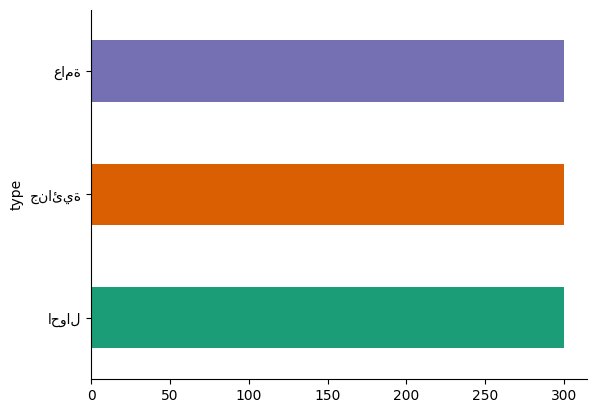

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-6-b2f34bc166bf>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")


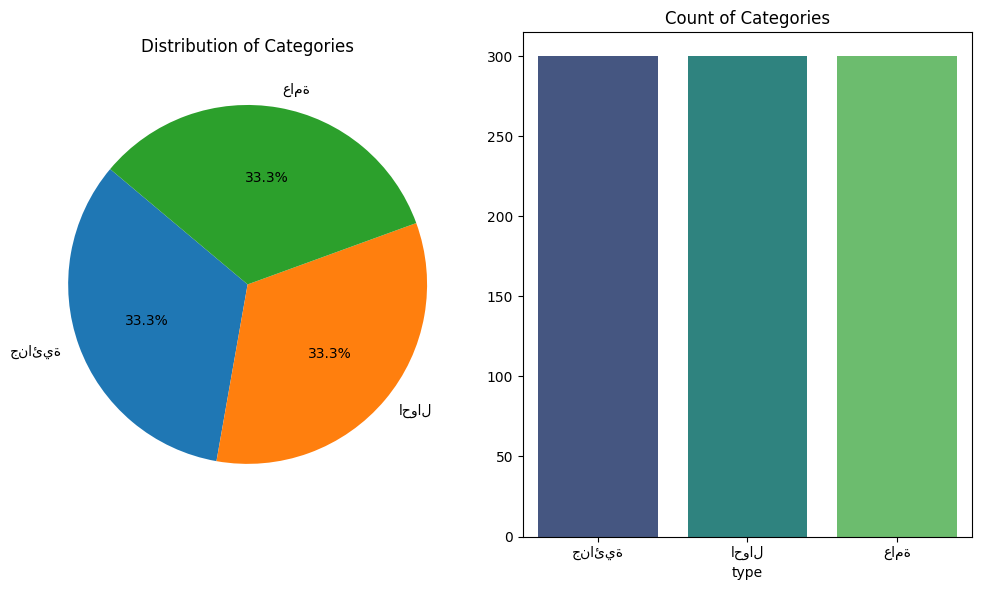

In [ ]:
# Value Count Of tybe
count = df[u'type'].value_counts()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 6), facecolor='white')

# Plot pie chart on the first subplot
palette = sns.color_palette("viridis")
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Categories')

# Plot bar chart on the second subplot
sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")
axs[1].set_title('Count of Categories')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
df.type.value_counts()

type
جنائية    300
احوال     300
عامة      300
Name: count, dtype: int64

In [ ]:
df.shape

(900, 4)

In [ ]:
df.columns

Index(['id_case', 'type', 'full_text', 'summary'], dtype='object')

In [ ]:
df.dtypes

id_case       int64
type         object
full_text    object
summary      object
dtype: object

# EDA (Exploratory data analysis)

In [ ]:
df.head()

,id_case,type,full_text,summary
0,1,جنائية,الحمد لله وحده، وبعد: وفي يوم الاثنين ١ / ١ / ...,أقام المدعي العام دعواه ضد المدعى عليه طالباً ...
1,2,جنائية,الحمد لله وحده، وبعد: فلدي أنا (...) القاضي في...,أقام المدعي العام دعواه ضد المدعى عليه، طالباً...
2,3,جنائية,الحمد لله وحده، والصلاة والسلام على من لا نبي ...,أقام المدعي العام دعواه ضد المدعى عليه، طالباً...
3,4,جنائية,الحمد لله وحده، وبعد: فلدي أنا (...) القاضي في...,أقام المدعي العام دعواه ضد الحدث المدعى عليه، ...
4,5,احوال,اليوم أطلب إلزامه بالنفقة الماضية على ابنتي هذ...,ادعت المدعية على المدعى عليه وكالة بأن موكله ت...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id_case    900 non-null    int64 
 1   type       900 non-null    object
 2   full_text  900 non-null    object
 3   summary    900 non-null    object
dtypes: int64(1), object(3)
memory usage: 28.2+ KB


In [ ]:
df=df.drop(['id_case'],axis=1)
df

,type,full_text,summary
0,جنائية,الحمد لله وحده، وبعد: وفي يوم الاثنين ١ / ١ / ...,أقام المدعي العام دعواه ضد المدعى عليه طالباً ...
1,جنائية,الحمد لله وحده، وبعد: فلدي أنا (...) القاضي في...,أقام المدعي العام دعواه ضد المدعى عليه، طالباً...
2,جنائية,الحمد لله وحده، والصلاة والسلام على من لا نبي ...,أقام المدعي العام دعواه ضد المدعى عليه، طالباً...
3,جنائية,الحمد لله وحده، وبعد: فلدي أنا (...) القاضي في...,أقام المدعي العام دعواه ضد الحدث المدعى عليه، ...
4,احوال,اليوم أطلب إلزامه بالنفقة الماضية على ابنتي هذ...,ادعت المدعية على المدعى عليه وكالة بأن موكله ت...
...,...,...,...
895,احوال,\nطلب المدعي إلزام الجهة المدعى عليها بإعادة ا...,\nطلب المدعي إلزام الجهة المدعى عليها بإعادة ا...
896,احوال,الحمد لله وحده وبعد فلدي أنا .... مساعد رئيس ...,ادعى وكيلا المدعين بأن مورثهم خلف من ضمن تركت...
897,احوال,الحمد لله وحده وبعد فلدي أنا القاضي في المحكمة...,ادعى المدعي ضد المدعى عليهم بأن مورثهم خلف عما...
898,احوال,الحمد لله وحده وبعد فلدي أنا القاضي في المحكمة...,ادعى المدعي بأنه كان زوجاً للمدعى عليها وقد تم...


In [ ]:
df.isnull().sum()

type         0
full_text    0
summary      0
dtype: int64

In [ ]:
df.full_text[0]

'الحمد لله وحده، وبعد: وفي يوم الاثنين ١ / ١ / ١٤٣٥هـ لدي أنا (...) القاضي بالمحكمة الجزائية بمحافظة القطيف افتتحت الجلسة في الساعة الحادية عشرة والنصف صباحاً بناء على المعاملة المحالة لنا من رئيس هذه المحكمة برقم ٣٤٥١٢٩٠٠ في ١١/١٣/ ١٤٣٤هـ والمقيدة لدى المحكمة بالقيد رقم ٣٤٢٥٩٨١٨٧ في ١١/١٣/ ١٤٣٤هـ وفي هذه الجلسة حضر المدعي العام (...) وقرر قائلاً : بصفتي مدعياً عاما في دائرة التحقيق والادعاء العام بمحافظة القطيف أدعي على : (...) ، البالغ من العمر (۳۲) عاماً، سعودي الجنسية بموجب السجل المدني رقم (...)، غير محصن، متسبب، أوقف بتاريخ ١٤٣٤/٨/٢٥ هـ وأفرج عنه بتاريخ ١٠/١١/ ١٤٣٤هـ استناداً للمادة (۱۲۰) من نظام الإجراءات الجزائية، ويقيم بمحافظة القطيف حيث إنه بتاريخ ١٤٣٣/٩/٢٧هـ وردت برقية مدير إدارة مباحث محافظة القطيف والموجهة لمدير شرطة محافظة القطيف برقم (٣٦٧٨) المتضمنة أنه توفرت معلومات عن المدعى عليه وشخصين آخرين أحدهما يدعى (...) والآخر يدعى (...)، يستخدمون الدرجات النارية وكذلك الأسلحة ببلدة (...)؛ ويقومون بتخويف المارة، ولهم علاقة بمثيري الشغب في المحافظة وبتاريخ ١٤٣٤/٨/٢٥هـ قبض على الم

In [ ]:
df.summary[0]

'أقام المدعي العام دعواه ضد المدعى عليه طالباً إثبات إدانته بالمشاركة في تجمعات ومسيرات بها إثارة وتأليب للرأي العام والنعرة الطائفية، وتردد بها هتافات معادية ومحرّضة على البلاد، وطلب الحكم عليه بعقوبة تعزيرية، وبعرض الدعوى على المدعى عليه، أنكر صحتها، ودفع بأنه شارك في تشييع جنائز ، وبطلب البينة من المدعي العام استند إلى تسجيلات مرئية لمظاهرات، وإلى إقرار المدعى عليه تحقيقا المتضمن مشاركته فيها، وبعرضه عليه أقر بصدوره منه، ودفع بأنه لم يردد أي هتافات، وأن صورته غير ظاهرة في التسجيل، ولأن المدعي العام لم يقدم بينة على ترديد المدعى عليه لهتافات معادية للبلاد، ولأن مشاركة المدعى عليه في ثلاث مسيرات ينادى فيها بعبارات معادية ومحرضة على البلاد إقرار منه لما حصل فيها، ولا يعفيه من العقوبة عليها، لذا فقد ثبت لدى القاضي قيام المدعى عليه بالمشاركة في مسيرات جنائز بها إثارة وتأليب للرأي العام والنعرة الطائفية، وتردد بها هتافات مسيئة ومعادية للدولة، ومحرضة على رجال الأمن، وحكم بسجنه لمدة ثلاثة أشهر، ومنعه من السفر خارج البلاد لمدة سنة، فاعترض الطرفان، وصدق الحكم من محكمة الاستئناف.'

In [ ]:
df.duplicated().sum()

0

In [ ]:
eda=df.copy()
stop = stopwords.words('arabic')

eda['Number_of_words_full_text'] = eda['full_text'].apply(lambda x: len(str(x).split(" ")))
eda['Number_of_charfull_text'] = eda['full_text'].str.len()
eda['stopwords_full_text'] = eda['full_text'].apply(lambda x: len([x for x in x.split() if x in stop]))


eda['Number_of_words_summary'] = eda['summary'].apply(lambda x: len(str(x).split(" ")))
eda['Number_of_char_summary'] = eda['summary'].str.len()
eda['stopwords_summary'] = eda['summary'].apply(lambda x: len([x for x in x.split() if x in stop]))

eda.head()


,type,full_text,summary,Number_of_words_full_text,Number_of_charfull_text,stopwords_full_text,Number_of_words_summary,Number_of_char_summary,stopwords_summary
0,جنائية,الحمد لله وحده، وبعد: وفي يوم الاثنين ١ / ١ / ...,أقام المدعي العام دعواه ضد المدعى عليه طالباً ...,1603,9115,332,167,985,37
1,جنائية,الحمد لله وحده، وبعد: فلدي أنا (...) القاضي في...,أقام المدعي العام دعواه ضد المدعى عليه، طالباً...,1218,6935,253,167,969,39
2,جنائية,الحمد لله وحده، والصلاة والسلام على من لا نبي ...,أقام المدعي العام دعواه ضد المدعى عليه، طالباً...,1046,5979,192,98,564,15
3,جنائية,الحمد لله وحده، وبعد: فلدي أنا (...) القاضي في...,أقام المدعي العام دعواه ضد الحدث المدعى عليه، ...,836,4778,145,102,586,21
4,احوال,اليوم أطلب إلزامه بالنفقة الماضية على ابنتي هذ...,ادعت المدعية على المدعى عليه وكالة بأن موكله ت...,427,2358,98,154,819,42


# pre_Processing

In [ ]:

def remove_numbers(text):
    cleaned_text = re.sub(r'\d+', '', text)
    return cleaned_text

# Apply remove_numbers function to the 'Text' column

df['cleaned_text'] = df['full_text'].apply(remove_numbers)
df['cleaned_summary'] = df['summary'].apply(remove_numbers)

In [ ]:
df['cleaned_text'][0]

'الحمد لله وحده، وبعد: وفي يوم الاثنين  /  / هـ لدي أنا (...) القاضي بالمحكمة الجزائية بمحافظة القطيف افتتحت الجلسة في الساعة الحادية عشرة والنصف صباحاً بناء على المعاملة المحالة لنا من رئيس هذه المحكمة برقم  في // هـ والمقيدة لدى المحكمة بالقيد رقم  في // هـ وفي هذه الجلسة حضر المدعي العام (...) وقرر قائلاً : بصفتي مدعياً عاما في دائرة التحقيق والادعاء العام بمحافظة القطيف أدعي على : (...) ، البالغ من العمر () عاماً، سعودي الجنسية بموجب السجل المدني رقم (...)، غير محصن، متسبب، أوقف بتاريخ // هـ وأفرج عنه بتاريخ // هـ استناداً للمادة () من نظام الإجراءات الجزائية، ويقيم بمحافظة القطيف حيث إنه بتاريخ //هـ وردت برقية مدير إدارة مباحث محافظة القطيف والموجهة لمدير شرطة محافظة القطيف برقم () المتضمنة أنه توفرت معلومات عن المدعى عليه وشخصين آخرين أحدهما يدعى (...) والآخر يدعى (...)، يستخدمون الدرجات النارية وكذلك الأسلحة ببلدة (...)؛ ويقومون بتخويف المارة، ولهم علاقة بمثيري الشغب في المحافظة وبتاريخ //هـ قبض على المدعى عليه من قبل جوازات منفذ (...) وأحيل لشرطة محافظة القطيف، والتي بدورها أحا

In [ ]:
df['cleaned_summary'][0]

'أقام المدعي العام دعواه ضد المدعى عليه طالباً إثبات إدانته بالمشاركة في تجمعات ومسيرات بها إثارة وتأليب للرأي العام والنعرة الطائفية، وتردد بها هتافات معادية ومحرّضة على البلاد، وطلب الحكم عليه بعقوبة تعزيرية، وبعرض الدعوى على المدعى عليه، أنكر صحتها، ودفع بأنه شارك في تشييع جنائز ، وبطلب البينة من المدعي العام استند إلى تسجيلات مرئية لمظاهرات، وإلى إقرار المدعى عليه تحقيقا المتضمن مشاركته فيها، وبعرضه عليه أقر بصدوره منه، ودفع بأنه لم يردد أي هتافات، وأن صورته غير ظاهرة في التسجيل، ولأن المدعي العام لم يقدم بينة على ترديد المدعى عليه لهتافات معادية للبلاد، ولأن مشاركة المدعى عليه في ثلاث مسيرات ينادى فيها بعبارات معادية ومحرضة على البلاد إقرار منه لما حصل فيها، ولا يعفيه من العقوبة عليها، لذا فقد ثبت لدى القاضي قيام المدعى عليه بالمشاركة في مسيرات جنائز بها إثارة وتأليب للرأي العام والنعرة الطائفية، وتردد بها هتافات مسيئة ومعادية للدولة، ومحرضة على رجال الأمن، وحكم بسجنه لمدة ثلاثة أشهر، ومنعه من السفر خارج البلاد لمدة سنة، فاعترض الطرفان، وصدق الحكم من محكمة الاستئناف.'

In [ ]:
def Removing_non_arabic(text):
    text =re.sub(r'[^0-9\u0600-\u06ff\u0750-\u077f\ufb50-\ufbc1\ufbd3-\ufd3f\ufd50-\ufd8f\ufd50-\ufd8f\ufe70-\ufefc\uFDF0-\uFDFD.0-9٠-٩]+', ' ',text)
    return text

df['cleaned_text'] = df['cleaned_text'].apply(Removing_non_arabic)
df['cleaned_summary'] = df['cleaned_summary'].apply(Removing_non_arabic)

In [ ]:
df['cleaned_text'][0]

'الحمد لله وحده، وبعد وفي يوم الاثنين هـ لدي أنا ... القاضي بالمحكمة الجزائية بمحافظة القطيف افتتحت الجلسة في الساعة الحادية عشرة والنصف صباحاً بناء على المعاملة المحالة لنا من رئيس هذه المحكمة برقم في هـ والمقيدة لدى المحكمة بالقيد رقم في هـ وفي هذه الجلسة حضر المدعي العام ... وقرر قائلاً بصفتي مدعياً عاما في دائرة التحقيق والادعاء العام بمحافظة القطيف أدعي على ... ، البالغ من العمر عاماً، سعودي الجنسية بموجب السجل المدني رقم ... ، غير محصن، متسبب، أوقف بتاريخ هـ وأفرج عنه بتاريخ هـ استناداً للمادة من نظام الإجراءات الجزائية، ويقيم بمحافظة القطيف حيث إنه بتاريخ هـ وردت برقية مدير إدارة مباحث محافظة القطيف والموجهة لمدير شرطة محافظة القطيف برقم المتضمنة أنه توفرت معلومات عن المدعى عليه وشخصين آخرين أحدهما يدعى ... والآخر يدعى ... ، يستخدمون الدرجات النارية وكذلك الأسلحة ببلدة ... ؛ ويقومون بتخويف المارة، ولهم علاقة بمثيري الشغب في المحافظة وبتاريخ هـ قبض على المدعى عليه من قبل جوازات منفذ ... وأحيل لشرطة محافظة القطيف، والتي بدورها أحالته للمباحث العامة بالمنطقة الشرقية، وبسماع أقواله 

In [ ]:
df['cleaned_summary'][0]

'أقام المدعي العام دعواه ضد المدعى عليه طالباً إثبات إدانته بالمشاركة في تجمعات ومسيرات بها إثارة وتأليب للرأي العام والنعرة الطائفية، وتردد بها هتافات معادية ومحرّضة على البلاد، وطلب الحكم عليه بعقوبة تعزيرية، وبعرض الدعوى على المدعى عليه، أنكر صحتها، ودفع بأنه شارك في تشييع جنائز ، وبطلب البينة من المدعي العام استند إلى تسجيلات مرئية لمظاهرات، وإلى إقرار المدعى عليه تحقيقا المتضمن مشاركته فيها، وبعرضه عليه أقر بصدوره منه، ودفع بأنه لم يردد أي هتافات، وأن صورته غير ظاهرة في التسجيل، ولأن المدعي العام لم يقدم بينة على ترديد المدعى عليه لهتافات معادية للبلاد، ولأن مشاركة المدعى عليه في ثلاث مسيرات ينادى فيها بعبارات معادية ومحرضة على البلاد إقرار منه لما حصل فيها، ولا يعفيه من العقوبة عليها، لذا فقد ثبت لدى القاضي قيام المدعى عليه بالمشاركة في مسيرات جنائز بها إثارة وتأليب للرأي العام والنعرة الطائفية، وتردد بها هتافات مسيئة ومعادية للدولة، ومحرضة على رجال الأمن، وحكم بسجنه لمدة ثلاثة أشهر، ومنعه من السفر خارج البلاد لمدة سنة، فاعترض الطرفان، وصدق الحكم من محكمة الاستئناف.'

In [ ]:
ara_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ''' + string.punctuation
stop_words = stopwords.words()

def remove_punctuations(text):

    #remove punctuations
    translator = str.maketrans('', '', ara_punctuations)
    text = text.translate(translator)

    return text


df['cleaned_text'] = df['cleaned_text'].apply(remove_punctuations)
df['cleaned_summary'] = df['cleaned_summary'].apply(remove_punctuations)

In [ ]:
df['cleaned_text'][0]

'الحمد لله وحده وبعد وفي يوم الاثنين ه لدي أنا  القاضي بالمحكمة الجزائية بمحافظة القطيف افتتحت الجلسة في الساعة الحادية عشرة والنصف صباحاً بناء على المعاملة المحالة لنا من رئيس هذه المحكمة برقم في ه والمقيدة لدى المحكمة بالقيد رقم في ه وفي هذه الجلسة حضر المدعي العام  وقرر قائلاً بصفتي مدعياً عاما في دائرة التحقيق والادعاء العام بمحافظة القطيف أدعي على   البالغ من العمر عاماً سعودي الجنسية بموجب السجل المدني رقم   غير محصن متسبب أوقف بتاريخ ه وأفرج عنه بتاريخ ه استناداً للمادة من نظام الإجراءات الجزائية ويقيم بمحافظة القطيف حيث إنه بتاريخ ه وردت برقية مدير إدارة مباحث محافظة القطيف والموجهة لمدير شرطة محافظة القطيف برقم المتضمنة أنه توفرت معلومات عن المدعى عليه وشخصين آخرين أحدهما يدعى  والآخر يدعى   يستخدمون الدرجات النارية وكذلك الأسلحة ببلدة   ويقومون بتخويف المارة ولهم علاقة بمثيري الشغب في المحافظة وبتاريخ ه قبض على المدعى عليه من قبل جوازات منفذ  وأحيل لشرطة محافظة القطيف والتي بدورها أحالته للمباحث العامة بالمنطقة الشرقية وبسماع أقواله الأولية من قبل ضابط خفر شعبة التحريات والبح

In [ ]:
df['cleaned_summary'][0]

'أقام المدعي العام دعواه ضد المدعى عليه طالباً إثبات إدانته بالمشاركة في تجمعات ومسيرات بها إثارة وتأليب للرأي العام والنعرة الطائفية وتردد بها هتافات معادية ومحرّضة على البلاد وطلب الحكم عليه بعقوبة تعزيرية وبعرض الدعوى على المدعى عليه أنكر صحتها ودفع بأنه شارك في تشييع جنائز  وبطلب البينة من المدعي العام استند إلى تسجيلات مرئية لمظاهرات وإلى إقرار المدعى عليه تحقيقا المتضمن مشاركته فيها وبعرضه عليه أقر بصدوره منه ودفع بأنه لم يردد أي هتافات وأن صورته غير ظاهرة في التسجيل ولأن المدعي العام لم يقدم بينة على ترديد المدعى عليه لهتافات معادية للبلاد ولأن مشاركة المدعى عليه في ثلاث مسيرات ينادى فيها بعبارات معادية ومحرضة على البلاد إقرار منه لما حصل فيها ولا يعفيه من العقوبة عليها لذا فقد ثبت لدى القاضي قيام المدعى عليه بالمشاركة في مسيرات جنائز بها إثارة وتأليب للرأي العام والنعرة الطائفية وتردد بها هتافات مسيئة ومعادية للدولة ومحرضة على رجال الأمن وحكم بسجنه لمدة ثلاثة أشهر ومنعه من السفر خارج البلاد لمدة سنة فاعترض الطرفان وصدق الحكم من محكمة الاستئناف'

In [ ]:
arabic_stopwords = stopwords.words("arabic")
len(arabic_stopwords)

754

In [ ]:
arabic_stopwords

['إذ',
 'إذا',
 'إذما',
 'إذن',
 'أف',
 'أقل',
 'أكثر',
 'ألا',
 'إلا',
 'التي',
 'الذي',
 'الذين',
 'اللاتي',
 'اللائي',
 'اللتان',
 'اللتيا',
 'اللتين',
 'اللذان',
 'اللذين',
 'اللواتي',
 'إلى',
 'إليك',
 'إليكم',
 'إليكما',
 'إليكن',
 'أم',
 'أما',
 'أما',
 'إما',
 'أن',
 'إن',
 'إنا',
 'أنا',
 'أنت',
 'أنتم',
 'أنتما',
 'أنتن',
 'إنما',
 'إنه',
 'أنى',
 'أنى',
 'آه',
 'آها',
 'أو',
 'أولاء',
 'أولئك',
 'أوه',
 'آي',
 'أي',
 'أيها',
 'إي',
 'أين',
 'أين',
 'أينما',
 'إيه',
 'بخ',
 'بس',
 'بعد',
 'بعض',
 'بك',
 'بكم',
 'بكم',
 'بكما',
 'بكن',
 'بل',
 'بلى',
 'بما',
 'بماذا',
 'بمن',
 'بنا',
 'به',
 'بها',
 'بهم',
 'بهما',
 'بهن',
 'بي',
 'بين',
 'بيد',
 'تلك',
 'تلكم',
 'تلكما',
 'ته',
 'تي',
 'تين',
 'تينك',
 'ثم',
 'ثمة',
 'حاشا',
 'حبذا',
 'حتى',
 'حيث',
 'حيثما',
 'حين',
 'خلا',
 'دون',
 'ذا',
 'ذات',
 'ذاك',
 'ذان',
 'ذانك',
 'ذلك',
 'ذلكم',
 'ذلكما',
 'ذلكن',
 'ذه',
 'ذو',
 'ذوا',
 'ذواتا',
 'ذواتي',
 'ذي',
 'ذين',
 'ذينك',
 'ريث',
 'سوف',
 'سوى',
 'شتان',
 'عدا',
 'عسى',
 'عل'

In [ ]:
df['cleaned_summary'][0]

'أقام المدعي العام دعواه ضد المدعى عليه طالباً إثبات إدانته بالمشاركة في تجمعات ومسيرات بها إثارة وتأليب للرأي العام والنعرة الطائفية وتردد بها هتافات معادية ومحرّضة على البلاد وطلب الحكم عليه بعقوبة تعزيرية وبعرض الدعوى على المدعى عليه أنكر صحتها ودفع بأنه شارك في تشييع جنائز  وبطلب البينة من المدعي العام استند إلى تسجيلات مرئية لمظاهرات وإلى إقرار المدعى عليه تحقيقا المتضمن مشاركته فيها وبعرضه عليه أقر بصدوره منه ودفع بأنه لم يردد أي هتافات وأن صورته غير ظاهرة في التسجيل ولأن المدعي العام لم يقدم بينة على ترديد المدعى عليه لهتافات معادية للبلاد ولأن مشاركة المدعى عليه في ثلاث مسيرات ينادى فيها بعبارات معادية ومحرضة على البلاد إقرار منه لما حصل فيها ولا يعفيه من العقوبة عليها لذا فقد ثبت لدى القاضي قيام المدعى عليه بالمشاركة في مسيرات جنائز بها إثارة وتأليب للرأي العام والنعرة الطائفية وتردد بها هتافات مسيئة ومعادية للدولة ومحرضة على رجال الأمن وحكم بسجنه لمدة ثلاثة أشهر ومنعه من السفر خارج البلاد لمدة سنة فاعترض الطرفان وصدق الحكم من محكمة الاستئناف'

In [ ]:
!pip install pyarabic

In [ ]:
import pyarabic.araby as araby
def remove_tashkeel(text):
    text = text.strip()
    text = re.sub("[إأٱآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    noise = re.compile(""" ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)
    text = re.sub(noise, '', text)
    text = re.sub(r'(.)\1+', r"\1\1", text)
    return araby.strip_tashkeel(text)

In [ ]:
df['cleaned_text'] = df['cleaned_text'].apply(remove_tashkeel)
df['cleaned_summary'] = df['cleaned_summary'].apply(remove_tashkeel)

In [ ]:
df['cleaned_text'][0]

'الحمد لله وحده وبعد وفي يوم الاثنين ه لدي انا  القاضي بالمحكمه الجزاءيه بمحافظه القطيف افتتحت الجلسه في الساعه الحاديه عشره والنصف صباحا بناء علي المعامله المحاله لنا من رءيس هذه المحكمه برقم في ه والمقيده لدي المحكمه بالقيد رقم في ه وفي هذه الجلسه حضر المدعي العام  وقرر قاءلا بصفتي مدعيا عاما في داءره التحقيق والادعاء العام بمحافظه القطيف ادعي علي  البالغ من العمر عاما سعودي الجنسيه بموجب السجل المدني رقم  غير محصن متسبب اوقف بتاريخ ه وافرج عنه بتاريخ ه استنادا للماده من نظام الاجراءات الجزاءيه ويقيم بمحافظه القطيف حيث انه بتاريخ ه وردت برقيه مدير اداره مباحث محافظه القطيف والموجهه لمدير شرطه محافظه القطيف برقم المتضمنه انه توفرت معلومات عن المدعي عليه وشخصين اخرين احدهما يدعي  والاخر يدعي  يستخدمون الدرجات الناريه وكذلك الاسلحه ببلده  ويقومون بتخويف الماره ولهم علاقه بمثيري الشغب في المحافظه وبتاريخ ه قبض علي المدعي عليه من قبل جوازات منفذ  واحيل لشرطه محافظه القطيف والتي بدورها احالته للمباحث العامه بالمنطقه الشرقيه وبسماع اقواله الاوليه من قبل ضابط خفر شعبه التحريات والبحث الجناءي

In [ ]:
df['cleaned_summary'][0]

'اقام المدعي العام دعواه ضد المدعي عليه طالبا اثبات ادانته بالمشاركه في تجمعات ومسيرات بها اثاره وتاليب للراي العام والنعره الطاءفيه وتردد بها هتافات معاديه ومحرضه علي البلاد وطلب الحكم عليه بعقوبه تعزيريه وبعرض الدعوي علي المدعي عليه انكر صحتها ودفع بانه شارك في تشييع جناءز  وبطلب البينه من المدعي العام استند الي تسجيلات مرءيه لمظاهرات والي اقرار المدعي عليه تحقيقا المتضمن مشاركته فيها وبعرضه عليه اقر بصدوره منه ودفع بانه لم يردد اي هتافات وان صورته غير ظاهره في التسجيل ولان المدعي العام لم يقدم بينه علي ترديد المدعي عليه لهتافات معاديه للبلاد ولان مشاركه المدعي عليه في ثلاث مسيرات ينادي فيها بعبارات معاديه ومحرضه علي البلاد اقرار منه لما حصل فيها ولا يعفيه من العقوبه عليها لذا فقد ثبت لدي القاضي قيام المدعي عليه بالمشاركه في مسيرات جناءز بها اثاره وتاليب للراي العام والنعره الطاءفيه وتردد بها هتافات مسيءه ومعاديه للدوله ومحرضه علي رجال الامن وحكم بسجنه لمده ثلاثه اشهر ومنعه من السفر خارج البلاد لمده سنه فاعترض الطرفان وصدق الحكم من محكمه الاستءناف'

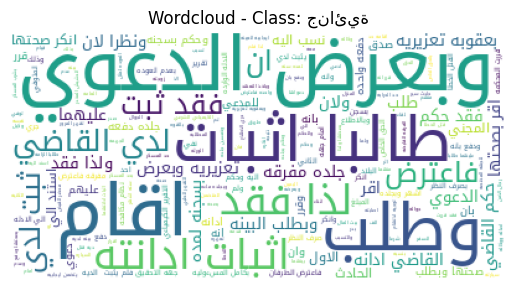

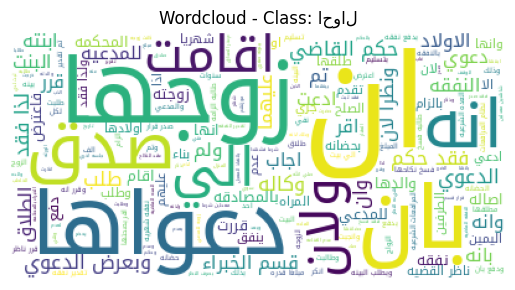

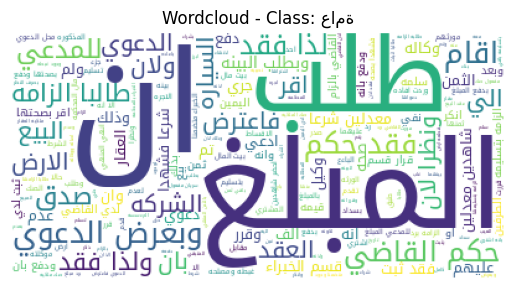

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud

classes = df["type"].unique()


custom_stopwords = ["المدعى", "المدعي", "الجنسية", "بموجب", "السجل", "المدني", "بتاريخ", "المدعية", "الجلسة", "وتاريخ", "وقد", "نبينا",
                    "العام", "حضر", "رقم", "حمد لله", "و صلى ", "المحكمة", "العامة", "سعودي", "برقم", "موكلي", "الوكالة", "عليها", "وحده", "الحمد", "لله", "وكالة", "الدعوى", "وبالله", "التوفيق", "وصحبه", "وسلم", "حرر", "في", "قال", "جاء", "ذكره",
 "أنه", "محمد", "الرقم", "المذكور", "السجل", "محكمة", "الاستئناف", "وصدق", "الحكم", "دعواه", "ولأن", "ضد", "أقام", "علي", "محكمه", "المدعيه", "الاستءناف"]

for class_name in classes:
    # Filter the text data for the current class
    class_text = " ".join(df[df["type"] == class_name]["cleaned_summary"].astype(str).tolist())

    # Generate a word cloud image for the current class
    wordcloud = WordCloud(font_path='/content/NotoKufiArabic-Regular.ttf', stopwords=stop_words + custom_stopwords, background_color="white").generate(class_text)

    # Display the word cloud
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Wordcloud - Class: " + class_name)
    plt.show()

In [ ]:
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize

def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df.cleaned_text=df.cleaned_text.apply(lambda text : tokenize_text(text))
df.cleaned_summary=df.cleaned_summary.apply(lambda text : tokenize_text(text))

In [ ]:
df['cleaned_text'][0]

['الحمد',
 'لله',
 'وحده',
 'وبعد',
 'وفي',
 'يوم',
 'الاثنين',
 'ه',
 'لدي',
 'انا',
 'القاضي',
 'بالمحكمه',
 'الجزاءيه',
 'بمحافظه',
 'القطيف',
 'افتتحت',
 'الجلسه',
 'في',
 'الساعه',
 'الحاديه',
 'عشره',
 'والنصف',
 'صباحا',
 'بناء',
 'علي',
 'المعامله',
 'المحاله',
 'لنا',
 'من',
 'رءيس',
 'هذه',
 'المحكمه',
 'برقم',
 'في',
 'ه',
 'والمقيده',
 'لدي',
 'المحكمه',
 'بالقيد',
 'رقم',
 'في',
 'ه',
 'وفي',
 'هذه',
 'الجلسه',
 'حضر',
 'المدعي',
 'العام',
 'وقرر',
 'قاءلا',
 'بصفتي',
 'مدعيا',
 'عاما',
 'في',
 'داءره',
 'التحقيق',
 'والادعاء',
 'العام',
 'بمحافظه',
 'القطيف',
 'ادعي',
 'علي',
 'البالغ',
 'من',
 'العمر',
 'عاما',
 'سعودي',
 'الجنسيه',
 'بموجب',
 'السجل',
 'المدني',
 'رقم',
 'غير',
 'محصن',
 'متسبب',
 'اوقف',
 'بتاريخ',
 'ه',
 'وافرج',
 'عنه',
 'بتاريخ',
 'ه',
 'استنادا',
 'للماده',
 'من',
 'نظام',
 'الاجراءات',
 'الجزاءيه',
 'ويقيم',
 'بمحافظه',
 'القطيف',
 'حيث',
 'انه',
 'بتاريخ',
 'ه',
 'وردت',
 'برقيه',
 'مدير',
 'اداره',
 'مباحث',
 'محافظه',
 'القطيف',
 'والموجهه',
 '

In [ ]:
df['cleaned_summary'][0]

['اقام',
 'المدعي',
 'العام',
 'دعواه',
 'ضد',
 'المدعي',
 'عليه',
 'طالبا',
 'اثبات',
 'ادانته',
 'بالمشاركه',
 'في',
 'تجمعات',
 'ومسيرات',
 'بها',
 'اثاره',
 'وتاليب',
 'للراي',
 'العام',
 'والنعره',
 'الطاءفيه',
 'وتردد',
 'بها',
 'هتافات',
 'معاديه',
 'ومحرضه',
 'علي',
 'البلاد',
 'وطلب',
 'الحكم',
 'عليه',
 'بعقوبه',
 'تعزيريه',
 'وبعرض',
 'الدعوي',
 'علي',
 'المدعي',
 'عليه',
 'انكر',
 'صحتها',
 'ودفع',
 'بانه',
 'شارك',
 'في',
 'تشييع',
 'جناءز',
 'وبطلب',
 'البينه',
 'من',
 'المدعي',
 'العام',
 'استند',
 'الي',
 'تسجيلات',
 'مرءيه',
 'لمظاهرات',
 'والي',
 'اقرار',
 'المدعي',
 'عليه',
 'تحقيقا',
 'المتضمن',
 'مشاركته',
 'فيها',
 'وبعرضه',
 'عليه',
 'اقر',
 'بصدوره',
 'منه',
 'ودفع',
 'بانه',
 'لم',
 'يردد',
 'اي',
 'هتافات',
 'وان',
 'صورته',
 'غير',
 'ظاهره',
 'في',
 'التسجيل',
 'ولان',
 'المدعي',
 'العام',
 'لم',
 'يقدم',
 'بينه',
 'علي',
 'ترديد',
 'المدعي',
 'عليه',
 'لهتافات',
 'معاديه',
 'للبلاد',
 'ولان',
 'مشاركه',
 'المدعي',
 'عليه',
 'في',
 'ثلاث',
 'مسيرات',
 'ينادي'

In [ ]:
!pip install tashaphyne
from tashaphyne.stemming import ArabicLightStemmer


In [ ]:
import nltk

def Arabic_Light_Stemmer(text):
    Arabic_Stemmer = ArabicLightStemmer()


    text=[Arabic_Stemmer.light_stem(y) for y in text]

    return " " .join(text)

df['Stemmed_text'] = df['cleaned_text'].apply(Arabic_Light_Stemmer)
df['Stemmed_summary'] = df['cleaned_summary'].apply(Arabic_Light_Stemmer)

In [ ]:
df['Stemmed_text'][0]

'حمد له حد بعد في وم اثن ه لدى نا قاض محكمه جزاءيه محافظ قطيف افتتح جلسه في ساعه حاديه عشر نصف صباح ناء على معامله محاله لنا من رءيس هذه محكمه رقم في ه مقيده لدى محكمه قيد رقم في ه في هذه جلسه حضر مدع عام قرر قاءل صف مدعي عام في داءر تحقيق ادعاء عام محافظ قطيف دع على بالغ من عمر عام سعود جنسيه موجب سجل مدن رقم غير محص متسبب وقف تاريخ ه فرج عن تاريخ ه ستناد ماده من ظام اجراء جزاءيه قيم محافظ قطيف حيث نه تاريخ ه رد رق مدير دار مباحث محافظ قطيف موجهه مدير شرط محافظ قطيف رقم متضمنه نه وفرت معلوم عن مدع على شخص خري حد دعي اخر دعي يستخدم درج ناريه كذلك اسلحه بلد قوم تخويف ماره هم علاق مثير شغب في محافظه تاريخ ه قبض على مدع على من قبل جواز منفذ حيل شرط محافظ قطيف التي دور حالت مباحث عامه منطقه شرقيه سماع قوال اوليه من قبل ضابط خفر شعب تحر بحث جناء شرط محافظ قطيف قر نه شار في شييع جثم كل من و قتيل في مواجه مسلحه مع رجال امن كما قر وجود عواميه اثناء شييع حد قتل مواجه مسلحه مع رجال امن مطلوب سابق جه امنيه نه قف اثناء شييع استجواب شان استخدام اسلحه علاق مثير شغب محافظ قطيف قر نه شار في شييع جناز 

In [ ]:
df['Stemmed_summary'][0]

'قام مدع عام دعوا ضد مدع على طالب ثبات ادان مشاركه في تجمع مسير بها ثار تاليب را عام نعره طاءفيه ردد بها هتاف معاد محرض على بلاد طلب حكم على عقوب عزير عرض دعو على مدع على نكر صح دفع ان شار في شييع جناءز طلب بينه من مدع عام ستند لي تسجيل مرء مظاهر لي قرار مدع على حقيق متضمن مشارك في عرض على قر صدور من دفع ان لم ردد اي هتاف ان صور غير ظاهر في تسجيل ان مدع عام لم قدم بين على رديد مدع على هتاف معاد بلاد ان مشارك مدع على في ثلاث مسير نادي في عبار معاد محرض على بلاد قرار من لما حصل في لا عفي من عقوبه على ذا قد ثب لدى قاض قيام مدع على مشاركه في مسير جناءز بها ثار تاليب را عام نعره طاءفيه ردد بها هتاف مسيء معاد دوله محرض على رجال امن حكم سجن مد ثلاث شهر منع من سفر خارج بلاد مد سن عترض طرف صدق حكم من محكم استءناف'

In [ ]:
df

,type,full_text,summary,cleaned_text,cleaned_summary,Stemmed_text,Stemmed_summary
0,جنائية,الحمد لله وحده، وبعد: وفي يوم الاثنين ١ / ١ / ...,أقام المدعي العام دعواه ضد المدعى عليه طالباً ...,"[الحمد, لله, وحده, وبعد, وفي, يوم, الاثنين, ه,...","[اقام, المدعي, العام, دعواه, ضد, المدعي, عليه,...",حمد له حد بعد في وم اثن ه لدى نا قاض محكمه جزا...,قام مدع عام دعوا ضد مدع على طالب ثبات ادان مشا...
1,جنائية,الحمد لله وحده، وبعد: فلدي أنا (...) القاضي في...,أقام المدعي العام دعواه ضد المدعى عليه، طالباً...,"[الحمد, لله, وحده, وبعد, فلدي, انا, القاضي, في...","[اقام, المدعي, العام, دعواه, ضد, المدعي, عليه,...",حمد له حد بعد لدى نا قاض في محكمه جزاءيه محافظ...,قام مدع عام دعوا ضد مدع على طالب ثبات ادان خرو...
2,جنائية,الحمد لله وحده، والصلاة والسلام على من لا نبي ...,أقام المدعي العام دعواه ضد المدعى عليه، طالباً...,"[الحمد, لله, وحده, والصلاه, والسلام, علي, من, ...","[اقام, المدعي, العام, دعواه, ضد, المدعي, عليه,...",حمد له حد صلاه سلام على من لا بي بعد بعد لدى ن...,قام مدع عام دعوا ضد مدع على طالب ثبات ادان خرو...
3,جنائية,الحمد لله وحده، وبعد: فلدي أنا (...) القاضي في...,أقام المدعي العام دعواه ضد الحدث المدعى عليه، ...,"[الحمد, لله, وحده, وبعد, فلدي, انا, القاضي, في...","[اقام, المدعي, العام, دعواه, ضد, الحدث, المدعي...",حمد له حد بعد لدى نا قاض في محكمه جزاءيه بريد ...,قام مدع عام دعوا ضد حدث مدع على طالب ثبات ادان...
4,احوال,اليوم أطلب إلزامه بالنفقة الماضية على ابنتي هذ...,ادعت المدعية على المدعى عليه وكالة بأن موكله ت...,"[اليوم, اطلب, الزامه, بالنفقه, الماضيه, علي, ا...","[ادعت, المدعيه, علي, المدعي, عليه, وكاله, بان,...",يوم طلب زامه نفقه ماضيه على ابن هذه دعو عرض ما...,دعت مدعيه على مدع على ال ان موكل زوج ثم طلق بع...
...,...,...,...,...,...,...,...
895,احوال,\nطلب المدعي إلزام الجهة المدعى عليها بإعادة ا...,\nطلب المدعي إلزام الجهة المدعى عليها بإعادة ا...,"[طلب, المدعي, الزام, الجهه, المدعي, عليها, باع...","[طلب, المدعي, الزام, الجهه, المدعي, عليها, باع...",طلب مدع زام جهه مدع على اعاد نظاره على وقاف اغ...,طلب مدع زام جهه مدع على اعاد نظاره على وقاف اغ...
896,احوال,الحمد لله وحده وبعد فلدي أنا .... مساعد رئيس ...,ادعى وكيلا المدعين بأن مورثهم خلف من ضمن تركت...,"[الحمد, لله, وحده, وبعد, فلدي, انا, مساعد, رءي...","[ادعي, وكيلا, المدعين, بان, مورثهم, خلف, من, ض...",حمد له حد بعد لدى نا مساعد رءيس محكمه عامه مدي...,دع يلا مدع ان مورث خلف من ضمن ترك عد عقار موصو...
897,احوال,الحمد لله وحده وبعد فلدي أنا القاضي في المحكمة...,ادعى المدعي ضد المدعى عليهم بأن مورثهم خلف عما...,"[الحمد, لله, وحده, وبعد, فلدي, انا, القاضي, في...","[ادعي, المدعي, ضد, المدعي, عليهم, بان, مورثهم,...",حمد له حد بعد لدى نا قاض في محكمه عامه رياض نا...,دع مدع ضد مدع على ان مورث خلف عمار ستراح اع حد...
898,احوال,الحمد لله وحده وبعد فلدي أنا القاضي في المحكمة...,ادعى المدعي بأنه كان زوجاً للمدعى عليها وقد تم...,"[الحمد, لله, وحده, وبعد, فلدي, انا, القاضي, في...","[ادعي, المدعي, بانه, كان, زوجا, للمدعي, عليها,...",حمد له حد بعد لدى نا قاض في محكمه عامه محافظ ج...,دع مدع ان كان زوج مدع على قد تم سخ نكاح بين قب...


# MODELS

In [ ]:
x =df['Stemmed_text']
y = df['type']

In [ ]:
x

0      حمد له حد بعد في وم اثن ه لدى نا قاض محكمه جزا...
1      حمد له حد بعد لدى نا قاض في محكمه جزاءيه محافظ...
2      حمد له حد صلاه سلام على من لا بي بعد بعد لدى ن...
3      حمد له حد بعد لدى نا قاض في محكمه جزاءيه بريد ...
4      يوم طلب زامه نفقه ماضيه على ابن هذه دعو عرض ما...
                             ...                        
895    طلب مدع زام جهه مدع على اعاد نظاره على وقاف اغ...
896    حمد له حد بعد لدى نا مساعد رءيس محكمه عامه مدي...
897    حمد له حد بعد لدى نا قاض في محكمه عامه رياض نا...
898    حمد له حد بعد لدى نا قاض في محكمه عامه محافظ ج...
899    حمد له حد بعد لدى نا قاض في محكمه عامه مدينه م...
Name: Stemmed_text, Length: 900, dtype: object

In [ ]:
y

0      جنائية
1      جنائية
2      جنائية
3      جنائية
4       احوال
        ...  
895     احوال
896     احوال
897     احوال
898     احوال
899     احوال
Name: type, Length: 900, dtype: object

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

In [ ]:
vectorizer = TfidfVectorizer()
x_train_tfidf = vectorizer.fit_transform(X_train)
x_test_tfidf = vectorizer.transform(X_test)

#RANDOM FOREST

**With stemming:**

In [ ]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier()
# Fit the model to the training data
rf_model.fit(x_train_tfidf, y_train)

RandomForestClassifier()

In [ ]:
# Make predictions on the training and testing data
rf_pred_train = rf_model.predict(x_train_tfidf)
rf_pred_test = rf_model.predict(x_test_tfidf)

In [ ]:


accuracy_rf = accuracy_score(y_train, rf_pred_train)
accuracy_rf_test = accuracy_score(y_test, rf_pred_test)

print("Random Forest training Accuracy:", accuracy_rf)
print("Random Forest testing Accuracy:", accuracy_rf_test)


Random Forest training Accuracy: 1.0
Random Forest testing Accuracy: 0.9444444444444444


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, rf_pred_test)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        58
           1       1.00      0.91      0.95        58
           2       0.91      0.97      0.94        64

    accuracy                           0.94       180
   macro avg       0.95      0.94      0.94       180
weighted avg       0.95      0.94      0.94       180



**Hyperparameter using GridSearch CV:**

In [ ]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced']
}

# Initialize the Random Forest model
rf_model_tuned = RandomForestClassifier()

# Perform grid search
grid_search_rf = GridSearchCV(estimator=rf_model_tuned, param_grid=param_grid_rf, scoring='accuracy', cv=5)
grid_search_rf.fit(x_train_tfidf, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': [None, 'balanced'],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [ ]:
# Get the best parameters and score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print("Best Parameters:", best_params_rf)
print("Best Score:", best_score_rf)

Best Parameters: {'class_weight': None, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}
Best Score: 0.9430555555555555


In [ ]:
# Initialize Random Forest with best parameters
rf_tuned = RandomForestClassifier(class_weight= None, max_depth= None, min_samples_leaf= 1, min_samples_split= 5, n_estimators= 100)
rf_tuned.fit(x_train_tfidf, y_train)


RandomForestClassifier(min_samples_split=5)

In [ ]:
# Make predictions on the training and testing data
rf_pred_train_tuned = rf_tuned.predict(x_train_tfidf)
rf_pred_test_tuned = rf_tuned.predict(x_test_tfidf)

In [ ]:
# Calculate evaluation metrics for the tuned model
accuracy_rf_tuned = accuracy_score(y_train, rf_pred_train_tuned)
accuracy_rf_test_tuned = accuracy_score(y_test, rf_pred_test_tuned)


print("Random Forest training Accuracy:", accuracy_rf_tuned)
print("Random Forest testing Accuracy:", accuracy_rf_test_tuned )

Random Forest training Accuracy: 1.0
Random Forest testing Accuracy: 0.9666666666666667


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, rf_pred_test_tuned)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        58
           1       1.00      0.95      0.97        58
           2       0.95      0.98      0.97        64

    accuracy                           0.97       180
   macro avg       0.97      0.97      0.97       180
weighted avg       0.97      0.97      0.97       180



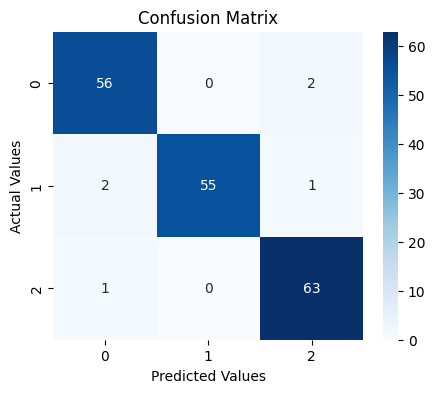

In [ ]:
# Compute confusion matrix
cm_df = confusion_matrix(y_test, rf_pred_test_tuned, labels=[0, 1, 2])

# Plotting the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm_df, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

# SVM (Support Vector Machine) model

**With stemming:**

In [ ]:
# SVM model
from sklearn.svm import SVC

SVM_model = SVC()

In [ ]:
SVM_model.fit(x_train_tfidf, y_train)

SVC()

In [ ]:
SVMy_pred_test = SVM_model.predict(x_test_tfidf)

SVMy_pred_train = SVM_model.predict(x_train_tfidf)

In [ ]:
accuracy_SVM = accuracy_score(y_train, SVMy_pred_train)
accuracy_svm_test = accuracy_score(y_test, SVMy_pred_test)


print("SVM stemmed training Accuracy : ", accuracy_SVM)
print("SVM stemmed testing Accuracy:", accuracy_svm_test)


SVM stemmed training Accuracy :  0.9972222222222222
SVM stemmed testing Accuracy: 0.9611111111111111


In [ ]:
from sklearn.metrics import classification_report
report_svm = classification_report(y_test, SVMy_pred_test)

print("Classification Report:")
print(report_svm)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        58
           1       1.00      0.93      0.96        58
           2       0.94      1.00      0.97        64

    accuracy                           0.96       180
   macro avg       0.96      0.96      0.96       180
weighted avg       0.96      0.96      0.96       180



**Hyperparameter using GridSearch CV:**

In [ ]:
SVM_model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.01, 0.1, 1, 10],
    'class_weight': [None, 'balanced']
}

# Create the SVM model
svm_model = SVC()

# Perform grid search
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(x_train_tfidf, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'gamma': [0.01, 0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [ ]:
# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'C': 10, 'class_weight': None, 'gamma': 0.01, 'kernel': 'linear'}
Best Score: 0.9569444444444445


In [ ]:
SVM_tuned = SVC(C =10, class_weight= None, gamma= 0.01, kernel= 'linear')
SVM_tuned.fit(x_train_tfidf, y_train)

SVC(C=10, gamma=0.01, kernel='linear')

In [ ]:
SVM_pred_train_tuned = SVM_tuned.predict(x_train_tfidf)
SVM_pred_test_tuned = SVM_tuned.predict(x_test_tfidf)

In [ ]:
accuracy_SVM_tuned = accuracy_score(y_train, SVM_pred_train_tuned)
accuracy_svm_test = accuracy_score(y_test, SVM_pred_test_tuned)


print("SVM stemmed training Accuracy : ", accuracy_SVM_tuned)
print("SVM stemmed testing Accuracy:", accuracy_svm_test)

SVM stemmed training Accuracy :  1.0
SVM stemmed testing Accuracy: 0.9722222222222222


In [ ]:
report_final= classification_report(y_test, SVM_pred_test_tuned)

print("Classification Report:")
print(report_final)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        58
           1       1.00      0.97      0.98        58
           2       0.95      0.98      0.97        64

    accuracy                           0.97       180
   macro avg       0.97      0.97      0.97       180
weighted avg       0.97      0.97      0.97       180



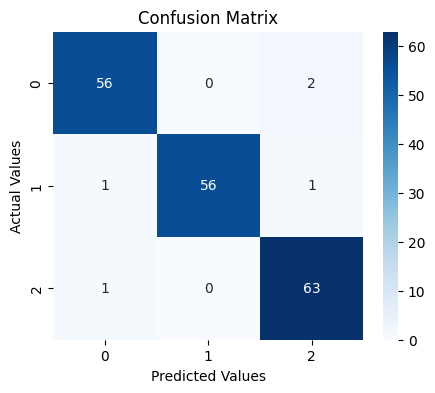

In [ ]:
# Compute confusion matrix
cm_df = confusion_matrix(y_test, SVM_pred_test_tuned, labels=[0, 1, 2])

# Plotting the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm_df, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

# NB (Naïve Bayes)

**With stemming:**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

NB_model = MultinomialNB()
NB_model.fit(x_train_tfidf, y_train)

MultinomialNB()

In [ ]:
NB_y_pred_test = NB_model.predict(x_test_tfidf)
NB_y_pred_train = NB_model.predict(x_train_tfidf)

In [ ]:
accuracy_NB_train = accuracy_score(y_train, NB_y_pred_train)
accuracy_NB_test = accuracy_score(y_test, NB_y_pred_test)


print("Naive Bayes stemmed Training Accuracy:", accuracy_NB_train)
print("Naive Bayes stemmed Testing Accuracy:", accuracy_NB_test)


Naive Bayes stemmed Training Accuracy: 0.9319444444444445
Naive Bayes stemmed Testing Accuracy: 0.9222222222222223


In [ ]:
report_nv = classification_report(y_test, NB_y_pred_test)

print("Classification Report:")
print(report_nv)

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91        58
           1       1.00      0.88      0.94        58
           2       0.91      0.94      0.92        64

    accuracy                           0.92       180
   macro avg       0.93      0.92      0.92       180
weighted avg       0.93      0.92      0.92       180



**Hyperparameter using GridSearch CV:**

In [ ]:
NB_model.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': 'warn'}

In [ ]:
param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0]}
# Create a Naive Bayes classifier
naive_bayes_tuned = MultinomialNB()

# Perform grid search with cross-validation
grid_search = GridSearchCV(naive_bayes_tuned, param_grid, cv=5)
grid_search.fit(x_train_tfidf, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0.5, 1.0, 2.0]})

In [ ]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best hyperparameters:", best_params)
print("Best score:", best_score)

Best hyperparameters: {'alpha': 0.1}
Best score: 0.9194444444444446


In [ ]:
NB_model_tuned = MultinomialNB(alpha=0.1)
NB_model_tuned.fit(x_train_tfidf, y_train)

MultinomialNB(alpha=0.1)

In [ ]:
NB_y_pred_tuned_test = NB_model_tuned.predict(x_test_tfidf)
NB_y_pred_train_tuned = NB_model_tuned.predict(x_train_tfidf)

In [ ]:
# Calculate evaluation metrics
accuracy_NB_train = accuracy_score(y_train, NB_y_pred_train_tuned)
accuracy_NB_test = accuracy_score(y_test, NB_y_pred_tuned_test)

# Print the evaluation metrics
print("Naive Bayes stemmed Training Accuracy:", accuracy_NB_train)
print("Naive Bayes stemmed Testing Accuracy:", accuracy_NB_test)


Naive Bayes stemmed Training Accuracy: 0.9666666666666667
Naive Bayes stemmed Testing Accuracy: 0.9444444444444444


In [ ]:
report_nv = classification_report(y_test, NB_y_pred_tuned_test)

print("Classification Report:")
print(report_nv)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93        58
           1       1.00      0.91      0.95        58
           2       0.93      0.97      0.95        64

    accuracy                           0.94       180
   macro avg       0.95      0.94      0.94       180
weighted avg       0.95      0.94      0.94       180



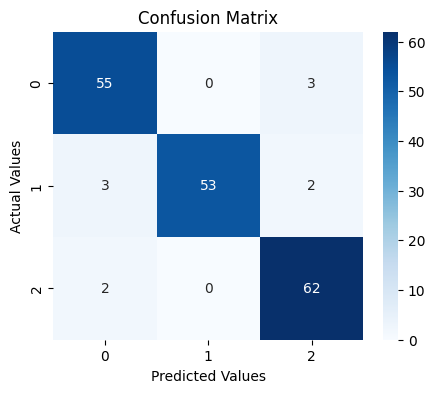

In [ ]:
# Compute confusion matrix
cm_df = confusion_matrix(y_test, NB_y_pred_tuned_test, labels=[0, 1, 2])

# Plotting the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm_df, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

# Comaparing the models. After tuning

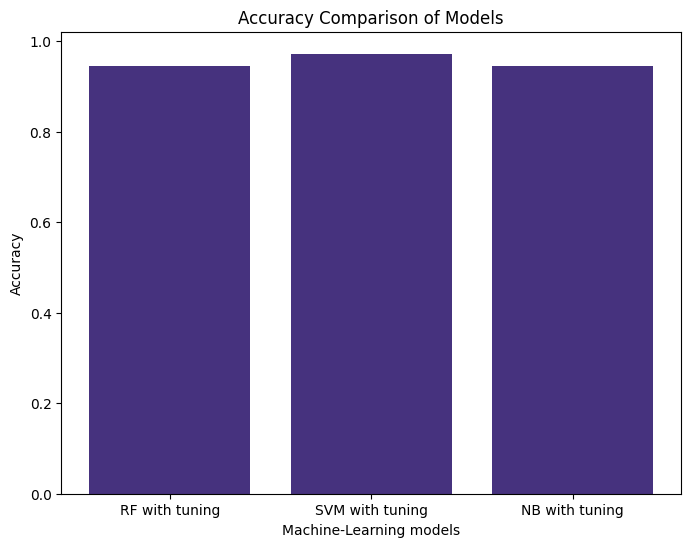

In [ ]:
import matplotlib.pyplot as plt

# Accuracy scores
accuracy_scores = [accuracy_rf_test, accuracy_svm_test, accuracy_NB_test]
models = ['RF with tuning', 'SVM with tuning', 'NB with tuning']

plt.figure(figsize=(8, 6))
plt.bar(range(len(models)), accuracy_scores)
plt.xlabel('Machine-Learning models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Models')
plt.xticks(range(len(models)), models)
plt.show()